In [2]:
import numpy as np
import numpy as np 
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [3]:
new_df = pd.read_csv('../Data/167_features.csv')
new_df = new_df.loc[:, ~new_df.columns.str.contains('^Unnamed')]

In [4]:
x_list = list(new_df)
x_list = x_list[:-1]
X = np.asarray(new_df[x_list])
Y = np.asarray(new_df['general_syntax#'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

In [5]:
svc_model = pickle.load(open('../models/poly_svc_model2.sav', 'rb'))

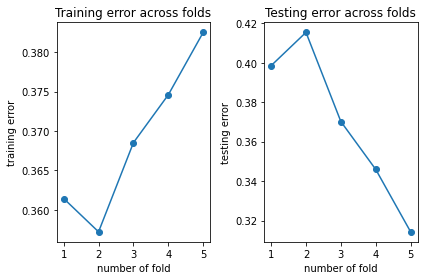

In [9]:
kf = KFold(n_splits=5)
list_training_error = []
list_testing_error = []
for train_index, test_index in kf.split(X):
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = Y[train_index], Y[test_index]
   y_train_data_pred = svc_model.predict(X_train)
   y_test_data_pred = svc_model.predict(X_test) 

   fold_training_error = mean_absolute_error(y_train, y_train_data_pred)        
   fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
   list_training_error.append(fold_training_error)
   list_testing_error.append(fold_testing_error)
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

In [6]:
y_pred = svc_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8188017535314175


In [11]:
svc_model_10 = pickle.load(open('../models/poly_svc_model4.sav', 'rb'))

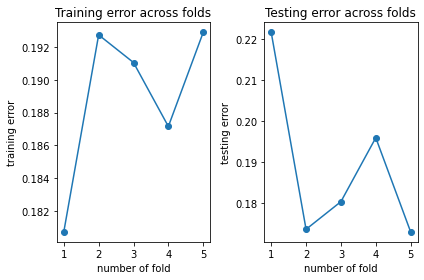

In [12]:
kf = KFold(n_splits=5)
list_training_error = []
list_testing_error = []
for train_index, test_index in kf.split(X):
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = Y[train_index], Y[test_index]
   y_train_data_pred = svc_model_10.predict(X_train)
   y_test_data_pred = svc_model_10.predict(X_test) 

   fold_training_error = mean_absolute_error(y_train, y_train_data_pred)        
   fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
   list_training_error.append(fold_training_error)
   list_testing_error.append(fold_testing_error)
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

In [13]:
y_pred = svc_model_10.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.909807073954984
